In [1]:
from pathlib import Path
from itertools import product

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
analysis_file = "/home/sdejong/pmchhg/masked_images/2023-05-17_PyIQ_output/14-30-27_PyIQ_analyze_out.csv"
splits_dir = Path("/home/sdejong/pmchhg/images-tif/splits-final")
diagnoses = "medulloblastoma+pilocytic-astrocytoma"
name = "pmchhg"
ext = ".png"

In [3]:
df_analysis = pd.read_csv(analysis_file)
df_analysis["Filename"] = df_analysis["Filename"].str.replace("masked_images/", "")

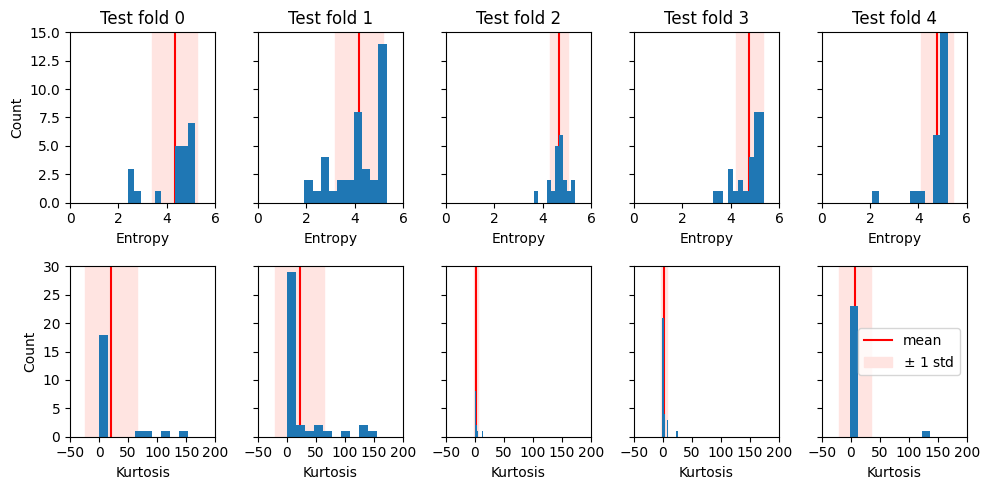

In [4]:
plt.style.use(style="default")
fig, axs = plt.subplots(2, 5, figsize=(10, 5), tight_layout=True, sharex="row",sharey="row")

means_fentropy = []
stds_fentropy = []
means_tentropy = []
means_kurtosis = []
for i, (split, subfold, fold) in enumerate(product(["test"], range(1), range(5))):
    i = fold
    splits_file = splits_dir / f"{diagnoses}_{name}_{split}-subfold-{subfold}-fold-{fold}.csv"
    splits_df = pd.read_csv(splits_file, names=["path", "case_id", "img_id", "target", "location"])
    splits_df["path"] = splits_df["path"].str.replace(".tif", ".png", regex=True)
    merged = splits_df.merge(df_analysis, left_on="path", right_on="Filename")
    mean_fEntropy = merged["fEntropy"].mean()
    std_fEntropy = merged["fEntropy"].std()
    mean_kurtosis = merged["Kurtosis"].mean()
    std_kurtosis = merged["Kurtosis"].std()
    means_fentropy.append(mean_fEntropy)
    stds_fentropy.append(std_fEntropy)
    means_kurtosis.append(mean_kurtosis)
    axs[0][i].axvline(mean_fEntropy, color="red", zorder=-1)
    axs[0][i].fill_betweenx([0, 15], mean_fEntropy - std_fEntropy, mean_fEntropy + std_fEntropy, zorder=-2, color="mistyrose")
    axs[1][i].axvline(mean_kurtosis, color="red", zorder=-1, label="mean")
    axs[1][i].fill_betweenx([0, 30], mean_kurtosis - std_kurtosis, mean_kurtosis + std_kurtosis, zorder=-2, color="mistyrose", label=r"$\pm$ 1 std")
    axs[0][i].hist(merged["fEntropy"])
    axs[1][i].hist(merged["Kurtosis"])
    axs[0][i].set_xlim([0, 6])
    axs[0][i].set_ylim([0, 15])
    axs[1][i].set_ylim([0, 30])
    axs[0][i].set_title(f"{split.capitalize()} fold {fold}")
    # axs[1][i].set_xlim([-20, 160])
    axs[1][i].set_xticks(np.arange(-50, 250, 50))
    axs[1][i].set_xlabel("Kurtosis")
    axs[0][i].set_xlabel("Entropy")
    axs[1][i].set_title("")


axs[0][0].set_ylabel("Count")
axs[1][0].set_ylabel("Count")
axs[1][4].legend(loc="center right")

fig.savefig(f"outputs/14/entropy-kurtosis-per-fold-split-{split}.pdf", dpi=300)


In [5]:
print(np.corrcoef([0.95, -0.21, 0.7, 0.19, 0.42], means_fentropy))
print(np.corrcoef([0.95, -0.21, 0.7, 0.19, 0.42], means_kurtosis))

[[1.         0.18036888]
 [0.18036888 1.        ]]
[[ 1.         -0.14405286]
 [-0.14405286  1.        ]]
